In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/bhanuswami026/experimental_projects/main/diabetes/diabetes.csv')

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df.iloc [:,0:-1]
y = df.iloc [:,-1]

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

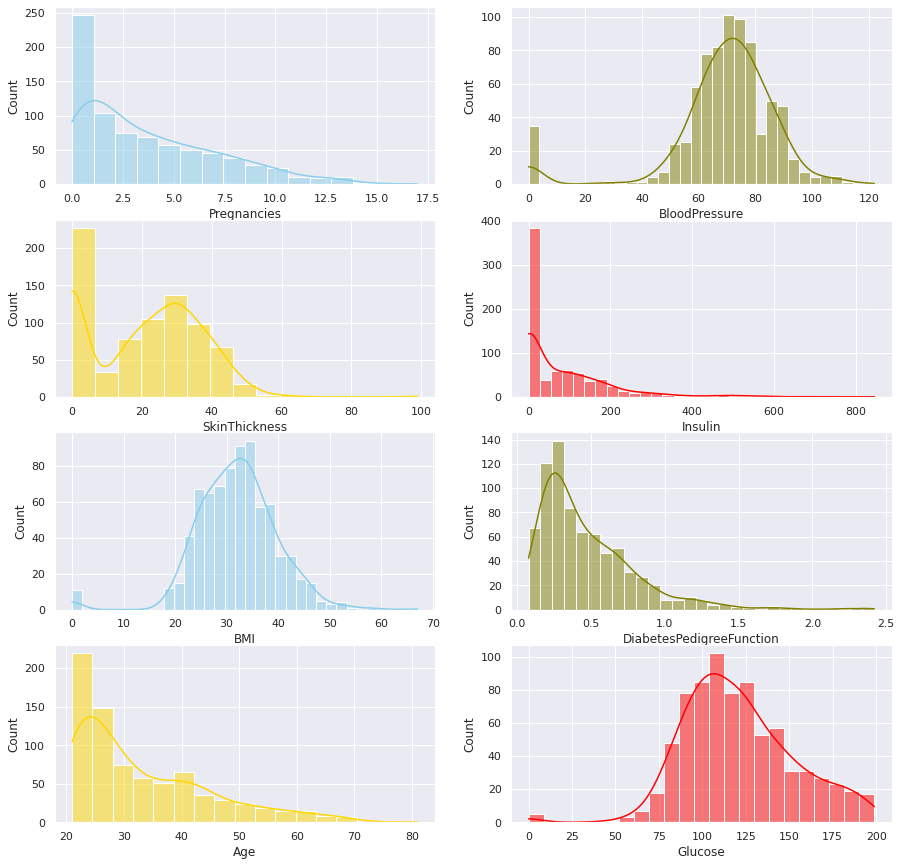

In [ ]:
#histogram of all variables
sns.set(style="darkgrid")

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.histplot(data=df, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="BloodPressure", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="SkinThickness", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Insulin", kde=True, color="red", ax=axs[1, 1])
sns.histplot(data=df, x="BMI", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="Age", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=df, x="Glucose", kde=True, color="red", ax=axs[3, 1])

plt.show()

In [ ]:
# Data transformation
column_mm = [0,3,4,7]
column_ss = [1,2,5,6]
t = [('mm',MinMaxScaler(),column_mm),('ss',PowerTransformer(method='yeo-johnson', standardize=True),column_ss)]
transformer = ColumnTransformer (transformers = t)

In [ ]:
# model building KNN
model_knn = KNeighborsClassifier()
s_knn = [('tr', transformer),('m', model_knn)]
pipeline_knn = Pipeline(steps=s_knn)

In [ ]:
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_knn = cross_val_score(pipeline_knn, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores_knn), np.std(n_scores_knn)))

Accuracy: 0.752 (0.048)


In [ ]:
# model building SVM
model_svm = SVC ()
s_svm = [('tr', transformer),('m', model_svm)]
pipeline_svm = Pipeline(steps=s_svm)
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_svm = cross_val_score(pipeline_svm, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores_svm), np.std(n_scores_svm)))

Accuracy: 0.764 (0.039)
